In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hexagon_utilities import *
from colors import *
from plot_functions import *

import matplotlib.pyplot as plt

## If we draw a number of thin parallel lines to make it look like hexagons

- take a random point on any edge. Pick the angle of its 'next' edge
- Find out where this point intersects another edge at a specified angle (point q)
- Draw a Line2D from p to q


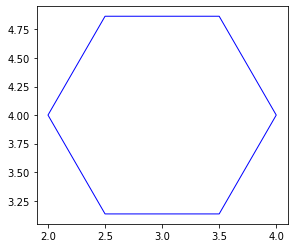

In [32]:
fig, ax = plt.subplots()
size=1
h = Hex(3,4, size)
h.get_verts()
h.render(fill=None, color='blue')
plt.axis('scaled')

mps = h.get_edge_midpoints()


(1.9, 4.1, 3.0181136675151765, 4.981989070742682)

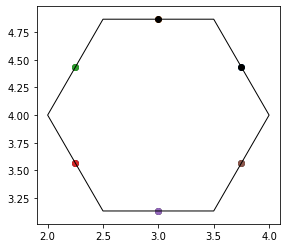

In [39]:
d6 = h.get_points_to_points_rtheta(mps, size*1.5, -30)

for p in range(6):
    plt.scatter(*mps[p])
    plt.scatter(*d6[p], color='k')
h.render(fill=None)
    
plt.axis('scaled')

(-0.3154700538379252,
 6.624871130596429,
 -0.5464101615137754,
 11.474613391789282)

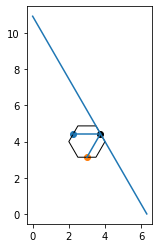

In [74]:
fig, ax = plt.subplots()

plt.scatter(*mps[0], color='k')
for a in [-30, -90]:
    dest = h.get_points_to_points_rtheta(mps, size*1.5, a)
    plt.scatter(*dest[0])
    draw_line(mps[0], dest[0], ax)

h.render(fill=None)




plt.axis('scaled')

## Logic to be Used

Edges are 01,12,23,34,45,50

**Useful Plotting Functions**

- draw_line(pt1, pt2)
- draw_pt_to_border_at_angle(pt, angle) #will find the intersecting point and draw line
- draw_line_from_rnd_edge_pt_angle(vertuple, angle, touch_border)


1. Get the equation of all 6 edges (ax+by+c=0)
2. get a random point in any given edge (has to be between its two vertices)
3. Pick one of two angles of the adjacent edges. (for 01, it would be angle-12 and angle-50)
4. Find intersection point on the border
5. Draw the line.

In [93]:
def get_line_equation(pt1, pt2):
    """Line encoded as l=(slope, intercept)
    
    Usage: lin_equ((-40, 30,), (20, 45))    
    """
    if np.equal([pt1[0]], [pt2[0]]):
        return(np.inf,np.NINF)
    
    m = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0])
    c = (pt2[1] - (m * pt2[0]))
    return m, c



(-0.6403411844343542,
 6.640341184434354,
 -3.6210235533030577,
 11.621023553303058)

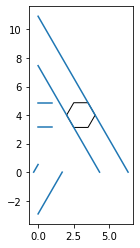

In [94]:
fig, ax = plt.subplots()
verts = h.get_verts()
vs =list(zip( [v.x for v in verts],[v.y for v in verts]))

h.render(fill=None)

for i in range(6):
    m,c = get_line_equation(vs[i], vs[(i+1)%6])
    if np.equal(m, 0.0):
        draw_line((1 , c), (0, c), ax=ax)
    else:
        draw_line((-1*c/m,0), (0, c), ax=ax)

plt.axis('scaled')

In [75]:
vs

[(4.0, 4.0),
 (3.5, 4.866025403784438),
 (2.5, 4.866025403784438),
 (2.0, 4.0),
 (2.4999999999999996, 3.1339745962155616),
 (3.5, 3.1339745962155616)]

(1.9, 4.1, 3.0473720558371173, 4.9526279441628835)

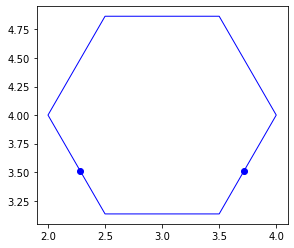

In [253]:
fig, ax = plt.subplots()

size=1
h = Hex(3,4, size)
h.get_verts()
h.render(fill=None, color='blue')

for e1,e2 in [(3,5)]:
    rnd_dist = np.random.random()*h.size
    xy = h.get_point_on_edge(e1, rnd_dist)
    plt.scatter(*xy, color='blue')        
    xy = h.get_point_on_edge(e2, size-rnd_dist)
    plt.scatter(*xy, color='blue')        


plt.axis('scaled')

(1.8916754377169476, 4.100396407727764, 3.019345736381499, 4.953962530803627)

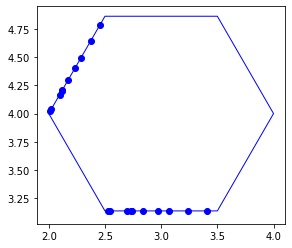

In [269]:
fig, ax = plt.subplots()

size=1
h = Hex(3,4, size)
h.get_verts()
h.render(fill=None, color='blue')

epairs = [(e, (e+2)%6) for e in range(6)]    

epair = epairs[np.random.randint(6)]
for e1,e2 in [epair]:
    for line in range(10):
        rnd_dist = np.random.random()*h.size
        xy = h.get_point_on_edge(e1, rnd_dist)
        plt.scatter(*xy, color='blue')        
        xy = h.get_point_on_edge(e2, size-rnd_dist)
        plt.scatter(*xy, color='blue')        


plt.axis('scaled')

In [282]:
def get_color(col_family):
    
    return np.random.choice(col_family)

(1.9, 4.1, 3.0473720558371173, 4.9526279441628835)

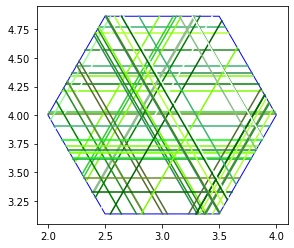

In [319]:
fig, ax = plt.subplots()

size=1
h = Hex(3,4, size)
h.get_verts()
h.render(fill=None, color='blue')

epairs = [(e, (e+2)%6) for e in range(6)]    


for epair in epairs:
    e1, e2 = epair[0], epair[1]
    for line in range(10):
        rnd_dist = np.random.random()*h.size
        xy = h.get_point_on_edge(e1, rnd_dist)
        xy2 = h.get_point_on_edge(e2, size-rnd_dist)
        draw_line(xy,xy2, ax=ax, color=get_color(GREENS))


plt.axis('scaled')

This works exactly as intended, but the effect is not good. For what I have in my mind, I am thinking of only ONE direction of lines inside the entire hexagon. This would be for example, the epairs (0,1) and (3,4)
or (1,2) and (4,5) or (2,3) and (5, 0)

```
opposite_epairs = [((0, 2), (3, 5)), 
                   ((1, 3), (4, 0)), 
                   ((2, 4), (5, 1))]
                   
```
Now, by randomly picking one set of opposite edge pairs, we can draw parallel lines inside the hexagon IN ONE direction only.

(1.9, 4.1, 3.0473720558371173, 4.9526279441628835)

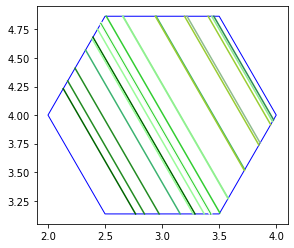

In [317]:
fig, ax = plt.subplots()

size=1
h = Hex(3,4, size)
h.get_verts()
h.render(fill=None, color='blue')

epairs = [(e, (e+2)%6) for e in range(6)]    


opposite_epairs = [((0, 2), (3, 5)), 
                   ((1, 3), (4, 0)), 
                   ((2, 4), (5, 1))]

for eset in opposite_epairs[np.random.randint(3)]:
    e1, e2 = eset[0], eset[1]
    for line in range(10):
        rnd_dist = np.random.random()*h.size
        xy = h.get_point_on_edge(e1, rnd_dist)
        xy2 = h.get_point_on_edge(e2, size-rnd_dist)
        draw_line(xy,xy2, ax=ax, color=get_color(GREENS))


plt.axis('scaled')

### Make it a callable Function for one Hexagon

Given a hexagon, it draws numerous parallel lines

In [420]:
opposite_epairs = [((0, 2), (3, 5)), 
                   ((1, 3), (4, 0)), 
                   ((2, 4), (5, 1))]

def draw_parallel_lines_inside_hexagon(h, edge_set=None, 
                                       num_lines=10, color_d={}, 
                                       **kwargs):
    
    if not edge_set:
        edge_set = opposite_epairs[np.random.randint(3)]
        
        
    for eset in edge_set:
        e1, e2 = eset[0], eset[1]
            
        for line in range(num_lines):
            rnd_dist = np.random.random()*h.size
            xy = h.get_point_on_edge(e1, rnd_dist)
            xy2 = h.get_point_on_edge(e2, size-rnd_dist)
            if 'color_family' in color_d:
                color = get_color(color_d['color_family'])
            else:
                color = 'k'

            draw_line(xy,xy2, ax=ax, color=color, **kwargs)



(1.9, 4.1, 3.0473720558371173, 4.9526279441628835)

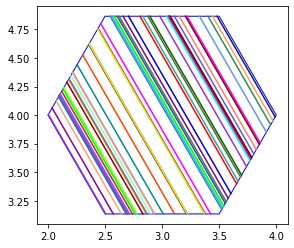

In [421]:
fig, ax = plt.subplots()

size=1
h = Hex(3,4, size)
h.get_verts()
h.render(fill=None, color='blue')

draw_parallel_lines_inside_hexagon(h, num_lines=25, color_d={'color_family': HIGH_SAT})
plt.axis('scaled')

11.691 10.8


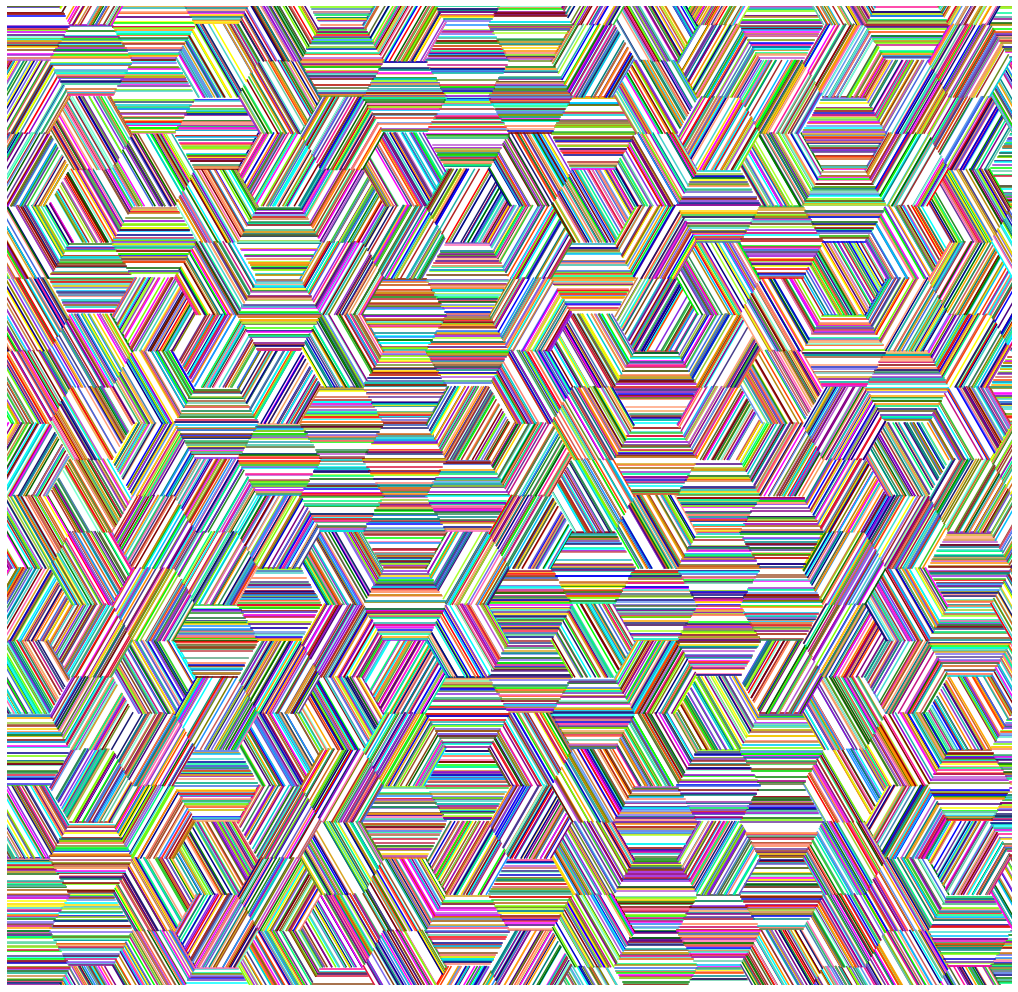

In [446]:
fig, ax = plt.subplots(figsize=(18,18))

bg_color = np.random.choice(YELLOWS_HIGH_SAT)
bg_color = 'white'
fc_bg = bg_color
fig.patch.set_facecolor(fc_bg)

size=1
num_rows, num_cols = 30, 12
hg = HexGrid(num_rows, num_cols, size, flat=True)

#COL = BLUES_HIGH_SAT + RED_BROWNS_HIGH_SAT #+ PINKS_LOW_SAT
#COL = RED_BROWNS_HIGH_SAT
#COL = PINKS_LOW_SAT
#COL = YELLOWS_HIGH_SAT + GREENS_HIGH_SAT
#COL = BLACK_WHITES_LOW_SAT
COL = HIGH_SAT

for idx, h in enumerate(hg.hlist):    
            
    draw_parallel_lines_inside_hexagon(h, color_d={'color_family': COL},
                                      num_lines=25)
    
    if np.random.random() > 2:
        _col = COL[np.random.randint(len(COL))]
        h.render(fill=None, lw=2, color='k', zorder=3)
            
    
plt.axis('equal')
xclip, yclip = 0.9, 0.9
y_range = size * 1.732 * num_rows / 4 * yclip
x_range = size * 2 * num_cols/2 * xclip

ax.set_ybound(lower=-1*y_range, upper=y_range)
ax.set_xbound(lower=-1*x_range, upper=x_range)
plt.axis('off')
print(y_range, x_range)
save_file(fig, 'Parallel_lines_RED_BROWNS_HIGH_SAT')

23.382 21.6


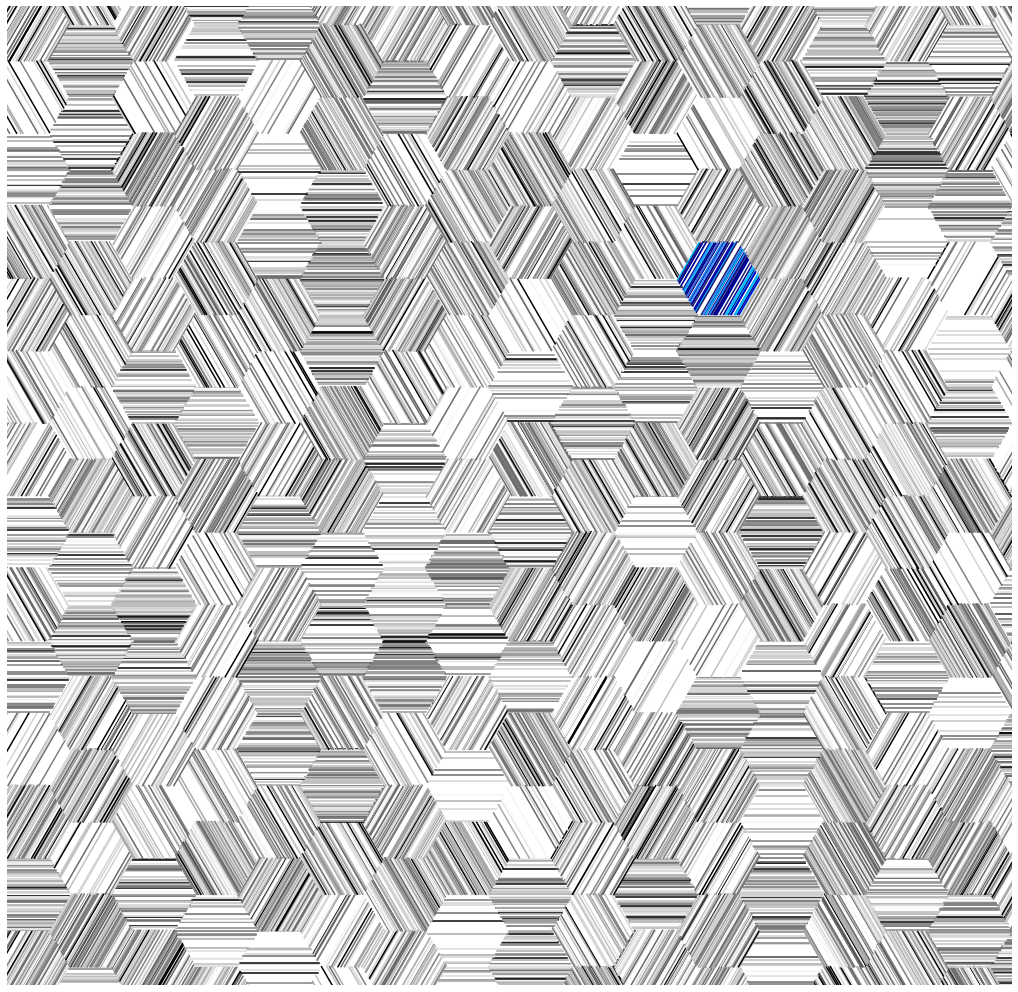

In [459]:
fig, ax = plt.subplots(figsize=(18,18))

bg_color = np.random.choice(YELLOWS_HIGH_SAT)
bg_color = 'white'
fc_bg = bg_color
fig.patch.set_facecolor(fc_bg)

size=2
num_rows, num_cols = 30, 12
hg = HexGrid(num_rows, num_cols, size, flat=True)


#COL = BLUES_HIGH_SAT + RED_BROWNS_HIGH_SAT #+ PINKS_LOW_SAT
#COL = RED_BROWNS_HIGH_SAT
#COL = PINKS_LOW_SAT
#COL = YELLOWS_HIGH_SAT + GREENS_HIGH_SAT
#COL = BLACK_WHITES_LOW_SAT
COL = GREENS_HIGH_SAT + RED_BROWNS_HIGH_SAT

COL_SEQ = [RED_BROWNS_HIGH_SAT, #BLACK_WHITES_LOW_SAT,
           BLUES_HIGH_SAT, GREENS_HIGH_SAT, BROWNS,
           BEIGES, BLUES, ORANGES, CYANS, YELLOWS_HIGH_SAT]

seq_num = 0
for idx, h in enumerate(hg.hlist):    
    
    if h.xc==0 and h.yc==0 and h.zc==0:
        COL = BLUES_HIGH_SAT
    else:
        COL = BLACK_WHITES
        
#     if np.random.random() < 0.6:
#         seq_num+=1    
#     COL = COL_SEQ[seq_num%len(COL_SEQ)]
    
    num_lines = np.random.randint(5, 50)    
    draw_parallel_lines_inside_hexagon(h, color_d={'color_family': COL},
                                       #edge_set=opposite_epairs[2],
                                      num_lines=num_lines)
                
    
plt.axis('equal')
xclip, yclip = 0.9, 0.9
y_range = size * 1.732 * num_rows / 4 * yclip
x_range = size * 2 * num_cols/2 * xclip

ax.set_ybound(lower=-1*y_range, upper=y_range)
ax.set_xbound(lower=-1*x_range, upper=x_range)
plt.axis('off')
print(y_range, x_range)
save_file(fig, 'Parallel_lines_odd_man_')

In [428]:
y_range


5.196